# MTH9875 Homework 4

Assigned: September 19, 2017.
Due: October 5, 2017 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr, randtoolbox
* Notes:


In [1]:
# Record the time
ptm<-proc.time()

### Load some useful R-code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875-4.zip", destfile="9875-4.zip")
unzip(zipfile="9875-4.zip")

In [3]:
source("BlackScholes.R")
source("Heston.R")

## The exponential martingale

### 1. (6 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

If $B_t$ is Brownian motion, show that

$$
X_t=e^{\int_0^t \sigma_s\,dB_s-\frac12\,\int_0^t\,\sigma_s^2\,ds}
$$

is a martingale. (Hint:  Apply Itô's Lemma to $e^Y$ where $Y=\log X$.)

Deduce that

$$
e^{\frac12\,\alpha^2\,t}=\E\left[e^{\alpha\,\sqrt{t}\,Z}\right]
%\label{eq:expmartingale}
$$

where $Z \sim N(0,1)$.  Is this last equation still true if $\alpha$ is a matrix?  Why?

### Answer of Q1

* Let $X_t=e^{Y_t}$, then we have:

$$
Y_t=\int_0^t \sigma_s\,dB_s-\frac12\,\int_0^t\,\sigma_s^2\,ds
$$

$\Rightarrow$

$$
d(Y_t)=\sigma_tdB_t-\frac{1}{2}\sigma_t^2dt
$$

* Appy Ito's Lemma to $X_t$, we have:

\begin{eqnarray*}
d\left(X_t\right)&=&d\left(e^{Y_t}\right)\\
&=&e^{Y_t}dY_t+\frac{1}{2}e^{Y_t}dY_tdY_t\\
&=&X_t\left(\sigma_tdB_t-\frac{1}{2}\sigma_t^2dt\right)+\frac{1}{2}X_t\sigma_t^2dt\\
&=&X_t\sigma_tdB_t
\end{eqnarray*}

* There is no drift term in $d(X_t)$. Therefore, $X_t$ is a martingale.

* As $Z \sim N(0,1)$, we can compute the expectation as:

\begin{eqnarray*}
\E\left[e^{\alpha\,\sqrt{t}\,Z}\right] &=& \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}}e^{\alpha \sqrt{t}}e^{-\frac{z^2}{2}}dz\\
&=& \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-\frac{(z-\alpha \sqrt{t})^2}{2}}e^{\frac{\alpha^2t}{2}}dz\\
&=&e^{\frac{\alpha^2t}{2}}
\end{eqnarray*}

* From the calculation above, we can see that the last equation is still true if $\alpha$ is a matrix, since all calculations are commutative.

## Strang splitting

### 2. (4 points) 

If $A$ and $B$ are (in general non-commutative) matrices, show that

$$
e^{(A+B)\,\Delta}=e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} + \cO(\Delta^3).
$$

### Answer of Q2

* First compute the right side. From lecture notes, we can compute the right side as:

\begin{eqnarray*}
e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} &=& \big[1 + \frac{A\Delta}{2} + \frac{A^2 \Delta^2}{8} + \cO(\Delta^3) \big]\cdot \big[1 + B\Delta + \frac12 B^2 \Delta^2 + \cO(\Delta^3) \big] \cdot \big[1 + \frac{A\Delta}{2} + \frac{A^2 \Delta^2}{8} + \cO(\Delta^3) \big]\\
&=& \big[ 1 + \frac12 A\Delta + B\Delta + \frac18 A^2\Delta^2 + \frac12 B^2\Delta^2 + \frac12 AB\Delta^2 + \cO(\Delta^3)\big] \cdot \big[1 + \frac{A\Delta}{2} + \frac{A^2 \Delta^2}{8} + \cO(\Delta^3) \big]\\
&=& 1 + (A+B)\Delta + \big(\frac12A + B\big)\Delta\cdot \frac12A\Delta + \big(\frac18 A^2 + \frac12 B^2 + \frac12 AB + \frac18 A^2 \big)\Delta^2 + \cO(\Delta^3)\\
&=& 1 + (A+B)\Delta + \frac12 (A+B)^2\Delta^2 + \cO(\Delta^3).
\end{eqnarray*}


* Similarly for left side, we have:

\begin{eqnarray*}
e ^{(A+B)\Delta} &=& 1 + (A+B)\Delta + \frac12 (A+B)^2 \Delta^2 + \cO(\Delta^3).
\end{eqnarray*}


* Therefore, by comparing this two equations, we have:

$$
e^{(A+B)\,\Delta}=e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} + \cO(\Delta^3).
$$


* Please note, $\cO(\Delta^3)$ here is different than $\cO(\Delta^3)$ in left side and right side euqations.

## Ninomiya-Victoir

### 3. (16 points)

Consider the following variance  process:

<a name="eq:varProcess"></a>(1)
$$
dv_t = -\lambda\,(v_t-\bar v)\,dt+\xi\,v_t\,dZ_t.
%\label{eq:vProcess}
$$

(a)
Let $f(v,t)=\E[g(v_T)|\cF_t]$ be the fair value at time $t$ of some claim on $v_T$.  Apply Itô's Lemma to $f$ to find the infinitesimal generator $ \cL$ of the diffusion such that 

$$
\frac{df}{dt}+ \cL f=0.
$$

(b)
Find first order differential operators $ V_0$ and $V_1$ such that

$$
 \cL= V_0+\frac12\,V_1^2.
$$

(c)  Solve the ODEs 

$$
 \frac{d }{dt} v(t) = V_0 v(t) \text{ and }  \frac{d }{dt} v(t) = V_1 v(t)
$$

with boundary condition $v(0)=v_0$.

(d)
Deduce the form of the Ninomiya-Victoir Monte Carlo time step for the variance process [(1)](#eq:varProcess) over some small time interval from $t$ to $t+\Delta$.

### Answer of Q3

#### Answer of (a): Find the infinitesimal generator

* Apply Ito's Lemma to $f$, we have:

\begin{eqnarray*}
df&=&\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial v}dv+\frac{1}{2}\frac{\partial^2f}{\partial v^2}dv^2\\
&=&\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial v}\left[-\lambda(v_t-\bar v)+\xi v_tdZ_t\right]+\frac{1}{2}\frac{\partial ^2f}{\partial v^2}\xi^2v_t^2dt\\
&=&\left[\frac{\partial f}{\partial t}-\lambda(v_t-\bar v)\frac{\partial f}{\partial v}+\frac{1}{2}\xi^2 v_t^2\frac{\partial^2 f}{\partial v^2}\right]dt+\frac{\partial f}{\partial v}\xi v_tdZ_t
\end{eqnarray*}

* From the given condition of $f$, we know that $f$ is a martingale. Therefore the drift term of $f$ equals to 0. Thus,

$$
\frac{\partial f}{\partial t}=\lambda(v_t-\bar v)\frac{\partial f}{\partial v}-\frac{1}{2}\xi^2v_t^2\frac{\partial^2 f}{\partial v}
$$


* Therefore, the infinitesimal generator is:
$$
\cL f = -\lambda(v_t-\bar v)\frac{\partial f}{\partial v}+\frac{1}{2}\xi^2v_t^2\frac{\partial^2 f}{\partial v}
$$

#### Answer of (b): Find $V_0$ and $V_1$

* Compare the infinitesimal generator to the given equation, we have:

$$
V_1 = \xi\, v \,\partial_v,
$$

$\Rightarrow$

\begin{eqnarray*}
\frac12 V_1^2 &＝& \frac12 \xi\, v \, \partial_v \, \big(\xi\, v \, \partial_v \big)\\
&=& \frac12 \xi\,v\, \big(\xi\,\partial_v + \xi\,v\, \partial_{v,v}  \big)\\
&=& \frac12 \xi^2\,v\, \big(\partial_v + v\, \partial_{v,v}  \big)\\
&=& \frac12 \xi^2\,v\,\partial_v  +  \frac12 \xi^2\,v^2\,\partial_{v,v}.
\end{eqnarray*}

* Then we have:

$$
V_0=\cL-\frac{1}{2}V_1^2=\left[-\lambda(v_t-\bar v)-\frac{1}{2}\xi^2 v_t\right]\partial_v
$$

#### Answer of (c): Solve the ODEs

* Solve $\frac{d }{dt} v(t) = V_0 v(t)$

* From (b), we have:

$$
V_0 = \big[-\lambda\,(v - \bar{v}) - \frac12 \xi^2\,v\,\big]\partial_v,
$$

$\Rightarrow$

\begin{eqnarray*}
\frac{d}{dt}v(t) &=& -\lambda\,(v(t) - \bar{v}) - \frac12 \xi^2\,v(t)\\
&=& -\big(\lambda + \frac12 \xi^2\big)\, v(t) + \lambda \bar{v}\\
&=& -\big(\lambda + \frac12 \xi^2\big)\,\Big[v(t) - \frac{\lambda \bar{v}}{\lambda + \frac12 \xi^2}   \Big]
\end{eqnarray*}

* Denote

$$
y_t = v(t) - \frac{\lambda \bar{v}}{\lambda + \frac12 \xi^2}\,\,\,\text{and}\,\,\,a = -(\lambda+\frac12 \xi^2), $$

* then we have:

$$
\frac{dy_t}{y_t} = a\, dt.
$$

$\Rightarrow$

$$
y_t = C\,e^{\,a\, t}
$$

* With initial boundary condition, $v(0)=v_0$, we have:

$$
v(t) = \frac{\lambda \bar{v}}{\lambda + \frac12\xi^2} + \Big[ v_0-\frac{\lambda \bar{v}}{\lambda + \frac12\xi^2} \Big]e^{-(\lambda + \frac12\xi^2)t}
$$

* Solve

* From (b), we have:

$$
V_1=\xi\, v \,\partial_v,
$$

* Then we have:

$$
\frac{d }{dt} v(t) = \xi v(t)
$$

* Solving the simple ODE, we have:

$$
v(t) = C\,e^{\xi t}
$$

* With initial boundary condition, $v(0)=v_0$ , we have:

$$
v(t) = v_0 e^{\xi t}
$$

#### Answer of (d): Deduce the form of the Ninomiya-Victoir Monte Carlo time step

\begin{eqnarray*}
v_{t+\Delta}&=&e^{V_0\Delta+V_1\sqrt{\Delta}Z}v_t\\
&\approx &e^{V_0\Delta/2}e^{V_1\sqrt{\Delta}Z}e^{V_0\Delta/2}v_t\\
&=&e^{V_0\Delta/2}e^{V_1\sqrt{\Delta}Z}\left[(v_t-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]\\
&=&e^{V_0\Delta/2}e^{\xi\sqrt{\Delta}Z}\left[(v_t-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]\\
&=&\left(e^{\xi\sqrt{\Delta}Z}\left[(v_t-\bar v')e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'\right]-\bar v'\right)e^{\left(-\lambda-\frac{1}{2}\xi^2\right)\Delta/2}+\bar v'
\end{eqnarray*}

where

$$
v'=\frac{\lambda \bar v}{\lambda+\frac12\xi^2}
$$

## Amend the Monte Carlo codes and generate samples

First we need to load libraries.

In [4]:
#install.packages("randtoolbox")

In [5]:
library(randtoolbox)
library(repr)
options(repr.plot.height=5)

Loading required package: rngWELL
This is randtoolbox. For overview, type 'help("randtoolbox")'.


### 4. (12 points) 

(a)

Amend both the Monte Carlo code (*HestonMC2*) and the Quasi-Monte Carlo code (*HestonQMC*) from Lecture 4 to return vectors of $x=\log S_T/S_0$ and instantaneous variance $v$.

(b)

Run these amended routines with BCC parameters,  $N=100,000$, $m=8$ (16 steps), `evolve=evolveAlfonsiF` .  Save the results so you can reuse these samples of $x$ and $v$.

(c)

Write R-code to reproduce the convergence plot shown in Figure 11 of the lecture slides (with $T=1$ and strike $K=1.2$).  You should reproduce this figure with informative axis labels and helpful formatting.


### Answer of Q4

#### Answer of (a): Amend code

In [6]:
# Monte Carlo Code (HestonMC2)
HestonMC2 <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2);
    rho2m1 <<- sqrt(1-rho*rho);
    vbarp <<- vbar - eta^2/(4*lambda);
    
    negCount <- 0;
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    xm <- x; vm <- v;
    W1m <- rep(0,N); W2m <- rep(0,N); 
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2); # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2; # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
            resm <- evolve(vm,xm,T/m,W1m,W2m,L);
            xm <- resm[,1];
            vm <- resm[,2];
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L);
        x <- res[,1];
        v <- res[,2];
        negCount <- negCount +mean(v<0)/n; #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x);
    Sm <- S0*exp(xm);

    # Now we have three vectors of final stock prices
  
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));  
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm;
    AV1[i] <- mean(V1);
    AV1dev[i] <- sd(V1) / sqrt(N);
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]);
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]);
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]);
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]);
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols};
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols};
  }
  
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  res_list<-list("impliedVol"=data.out,"x"=x,"v"=v)
  return(res_list) 
}
return(res)
}

In [7]:
# Quasi-Monte Carlo (HestonQMC)
HestonQMC <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda
    rho <<- params$rho
    eta <<- params$eta
    vbar <<- params$vbar
    v0 <<- params$v
  
    n <- m*2 #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2)
    rho2m1 <<- sqrt(1-rho*rho)
    vbarp <<- vbar - eta^2/(4*lambda)
    
    negCount <- 0
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0
    xm <- x; vm <- v
    W1m <- rep(0,N); W2m <- rep(0,N)
    
    # Generation of quasi random numbers now takes place outside the timestep loop
    Z <- sobol(n=N,dim=n,scram=3,seed=4711,norm=T)
      Zperp <- sobol(n=N,dim=n,scram=3,seed=17,norm=T)
      
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- Z[,i] #Take ith column of pre-generated quasi-rvs
        W2 <- Zperp[,i]
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1)
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2)
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1 # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p) 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2) # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2 # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            resm <- evolve(vm,xm,T/m,W1m,W2m,L)
            xm <- resm[,1]
            vm <- resm[,2]
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L)
        x <- res[,1]
        v <- res[,2]
        
  }

    S <- S0*exp(x)
    Sm <- S0*exp(xm)

    # Now we have three vectors of final stock prices
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm
    AV1[i] <- mean(V1)
    AV1dev[i] <- sd(V1) / sqrt(N)
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i])
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i])
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i])
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i])
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols}
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols}
  }
  
  data.out <- data.frame(AK,rep(N,M),rep(2*m,M),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom)
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","2sd","ivolm", "ivolRichardson", "biasRichardson",
                       "2sdRichardson")
  res_list<-list("impliedVol"=data.out,"x"=x,"v"=v)
  return(res_list)
  
}
return(res)
}

#### Answer of (b): Run these amended routines with given BCC parameters

In [8]:
# Since evolveAlfonsiF is used, get the code of it
evolveAlfonsiF <- function(v,x,dt,W1,W2,L=NULL){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

In [9]:
# BCC parameters
paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = 0.04)

In [10]:
# Compute the Exact Heston implied vols
strikes <- c(0.8,1.0,1.2) 
exactHestonVolsBCC <- sapply(strikes,function(K){impvolHeston(paramsBCC)(log(K),1)})

In [11]:
# Monte Carlo
res_MC<-HestonMC2(paramsBCC)(S0=1, T=1, AK=strikes, N=100000, m=8, evolve=evolveAlfonsiF, exactVols=exactHestonVolsBCC)
x_MC<-res_MC$x
v_MC<-res_MC$v

# QMC
res_QMC<-HestonQMC(paramsBCC)(S0=1,T=1,AK=strikes,N=100000,m=8,evolve=evolveAlfonsiF,exactVols=exactHestonVolsBCC)
x_QMC<-res_QMC$x
v_QMC<-res_QMC$v


In [12]:
# Check the results
print("Monte Carlo Results")
print(res_MC$impliedVol)
print("Quasi-Monte Carlo Results")
print(res_QMC$impliedVol)

[1] "Monte Carlo Results"
  Strikes Paths Steps      ivol          bias       twoSd     ivolm
1     0.8 1e+05    16 0.2285762 -0.0004194868 0.004398078 0.2284458
2     1.0 1e+05    16 0.1819042  0.0001760936 0.001558245 0.1817778
3     1.2 1e+05    16 0.1519359 -0.0001119045 0.001120794 0.1518847
  ivolRichardson biasRichardson twoSdRichardson
1      0.2287066  -2.891321e-04     0.004472849
2      0.1820306   3.025121e-04     0.001602085
3      0.1519870  -6.078568e-05     0.001171434
[1] "Quasi-Monte Carlo Results"
  Strikes Paths Steps      ivol          bias         2sd     ivolm
1     0.8 1e+05    16 0.2291244  0.0001286677 0.004377674 0.2289755
2     1.0 1e+05    16 0.1814651 -0.0002630298 0.001558007 0.1814211
3     1.2 1e+05    16 0.1517967 -0.0002510450 0.001119462 0.1519832
  ivolRichardson biasRichardson 2sdRichardson
1      0.2292733   0.0002775190   0.004448931
2      0.1815091  -0.0002190575   0.001599923
3      0.1516099  -0.0004378812   0.001170937


#### Answer of (c): Write R-code to reproduce the convergence plot shown in Figure 11 of the lecture slides (with  $T=1$  and strike  $K=1.2$ )

In [13]:
# Compute the implied vol
# Record the time
ptm<-proc.time()
Vol_MC<-function(N){HestonMC2(paramsBCC)(S0=1, T=1, AK=1.2, N, m=8, evolve=evolveAlfonsiF, exactVols=NULL)$impliedVol["ivolRichardson"][1,]}
Vol_QMC<-function(N){HestonQMC(paramsBCC)(S0=1, T=1, AK=1.2, N, m=8, evolve=evolveAlfonsiF, exactVols=NULL)$impliedVol["ivolRichardson"][1,]}

paths<-seq(1000,100000,2000) # 1K to 100K

impliedvol_MC<-sapply(paths,Vol_MC)
impliedvol_QMC<-sapply(paths,Vol_QMC)

impliedVol_exact<-impvolHestonRaw(paramsBCC)(k=log(1.2),t=1)
UpperVol <- rep(impliedVol_exact+0.001,length(paths))
LowerVol <- rep(impliedVol_exact-0.001,length(paths))

print('The running time of the computation is: ')
proc.time()-ptm

[1] "The running time of the computation is: "


   user  system elapsed 
 77.124   8.923  86.277 

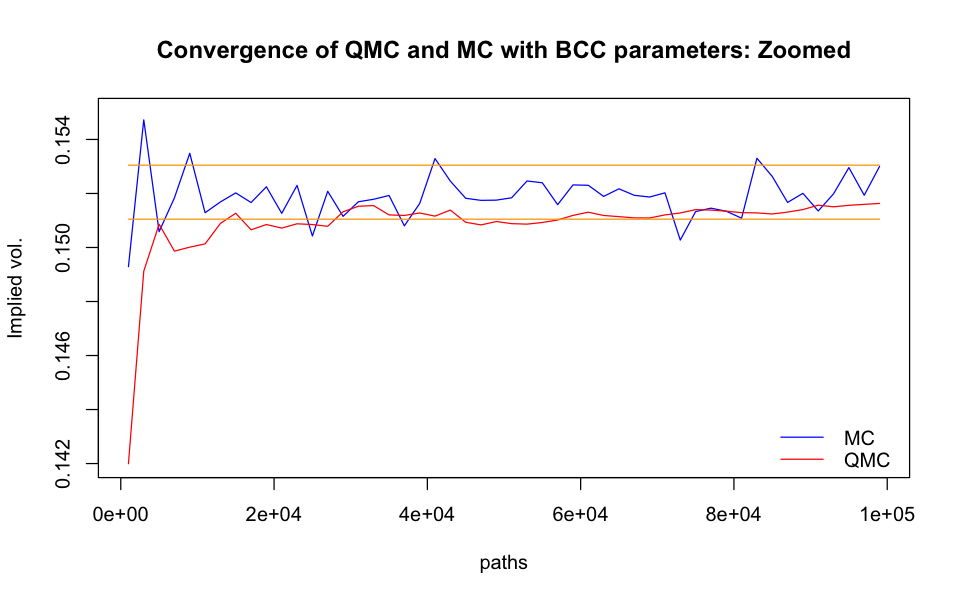

In [14]:
# Plot the convergence of MC and QMC
options(repr.plot.height=5,repr.plot.width=8)
yrange <- c(0.142, 0.155)
plot(paths,impliedvol_MC,type="l",col="blue",ylim=yrange,ylab="Implied vol.",
    main="Convergence of QMC and MC with BCC parameters: Zoomed")
lines(paths,impliedvol_QMC,col="red",ylim=yrange)
lines(paths,UpperVol,col="orange")
lines(paths,LowerVol,col="orange")
legend("bottomright",c("MC","QMC"),lty=1,bty='n', 
       y.intersp=1.5,cex=1,col=c("blue", "red"))

### 5.  (10 points) 

For the following, use the samples of $x$ and $v$ generated using MC and QMC with 100,000 paths from Problem 4.

(a)

Plot the Heston implied volatility smile from the quasi-closed-form Heston formula.  Superimpose MC and QMC smiles to reproduce something like Figure 14 in Lecture 4.

(b)

Using both MC and QMC samples from Problem 4, numerically estimate the local volatility function

$$
v_\ell(x,1)=\E[v_1|x_1=x]
$$

and plot $v_\ell(x,1)$ as a function of $x$.  (Tip: I recommend binning the data rather than running *e.g.* kernel regression.)

(c)

Superimpose the Heston implied variance smile (use part (a)) on your local variance smile from part (c) to reproduce something like Figure 15 (but with only 100,000 paths).  Comment on the qualitative features of the implied volatility and local volatility smiles.

### Answer of Q5

#### Answer of (a): Plot the Heston implied volatility smile from the quasi-closed-form Heston formula

In [15]:
# Closed form
impliedVol_exact<-function(K){impvolHestonRaw(paramsBCC)(k=log(K),t=1)}
# MC
impliedVol_MC<-function(K){
    S<-exp(x_MC);
    V <- (S>K)*(S - K);
    AV <- mean(V);
    BSV<- BSImpliedVolCall(1, K, 1, 0, AV);
    return(BSV)
}
# QMC
impliedVol_QMC<-function(K){
    S<-exp(x_QMC);
    V <- (S>K)*(S - K);
    AV <- mean(V);
    BSV<- BSImpliedVolCall(1, K, 1, 0, AV);
    return(BSV)
}

strikes<-seq(0.5,1.5,0.05)
IV_exact<-sapply(strikes,impliedVol_exact)
IV_MC<-sapply(strikes,impliedVol_MC)
IV_QMC<-sapply(strikes,impliedVol_QMC)

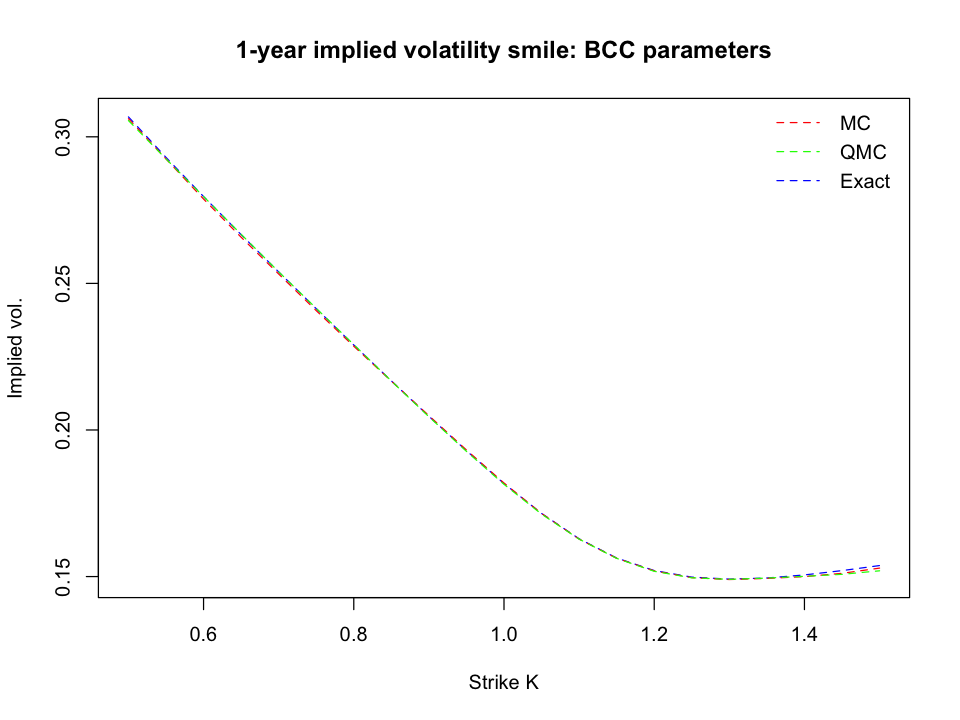

In [16]:
# Reproduce Figure 14 in lecture notes
options(repr.plot.height=6,repr.plot.width=8)
plot(strikes,IV_exact,type="l",lty=2,col="blue",xlab="Strike K",ylab="Implied vol.",
    main="1-year implied volatility smile: BCC parameters")
lines(strikes,IV_MC,col="red",lty=2)
lines(strikes,IV_QMC,col="green",lty=2)
legend("topright",c("MC","QMC","Exact"),lty=2,col=c('red','green','blue'),
      bty='n', y.intersp=1.5,cex=1)

#### Answer of (b) and (c): Plot similar figure as Figure 15 in lecture notes

In [17]:
# Bin the data
xv_MC<-cbind(x_MC,v_MC)
xv_QMC<-cbind(x_QMC,v_QMC)
xv_sample<-data.frame(rbind(xv_MC,xv_QMC))
colnames(xv_sample)<-c("x_sample","v_sample")
x_min<-min(xv_sample[,"x_sample"])
x_max<-max(xv_sample[,"x_sample"])
bins<-100
bin_size<-(x_max-x_min)/bins

In [18]:
# Local variance
localVar<-function(x){
    i<-floor((x-x_min)/bin_size)
    xl<-x_min+i*bin_size
    xh<-x_min+(i+1)*bin_size
    xv_sample.subset<-subset(xv_sample,x_sample>=xl&x_sample<xh)
    v_mean<-mean(xv_sample.subset[,"v_sample"])
    v_std<-sd(xv_sample.subset[,"v_sample"])/sqrt(dim(xv_sample.subset)[1])
    return(cbind(v_mean,v_std))
}

x<-seq(-0.5,0.5,0.02)
# Compute Local Vol
local_Var<-sapply(x,localVar)

impliedVar<-sapply(x,function(x){((impliedVol_MC(exp(x))+impliedVol_QMC(exp(x)))/2)^2})


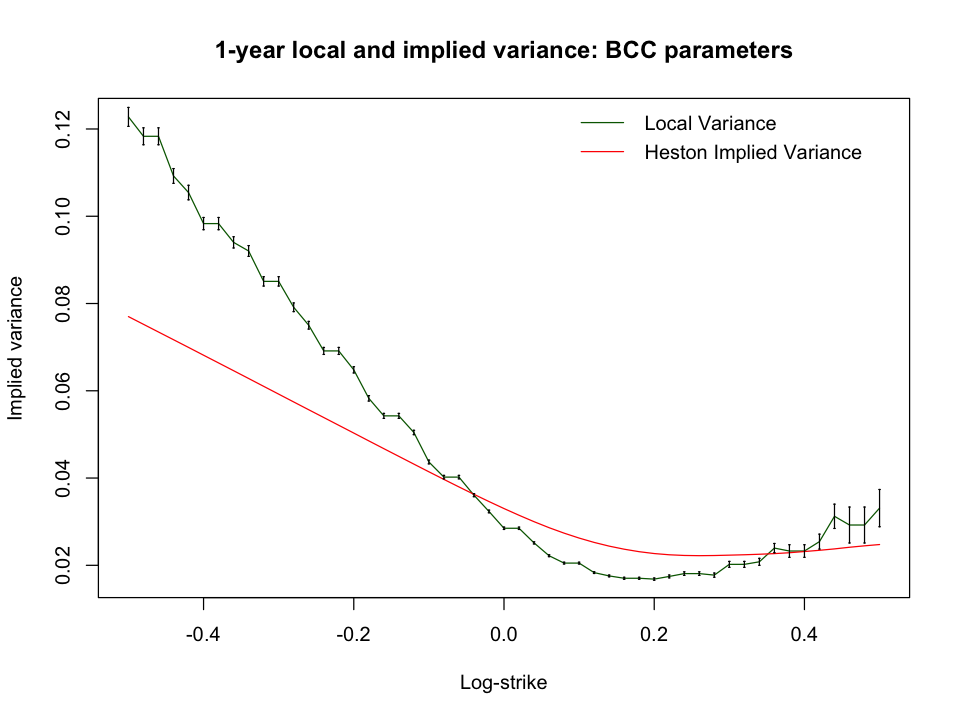

In [19]:
# Reproduce Figure 15 in lecture notes
options(repr.plot.height=6,repr.plot.width=8)
plot(x,local_Var[1,],type="l",col="dark green",xlab="Log-strike",ylab="Implied variance",
    main="1-year local and implied variance: BCC parameters")
lines(x,impliedVar,col="red")
legend("topright",c("Local Variance","Heston Implied Variance"),lty=1,
       col=c("dark green","red"),
      bty='n', y.intersp=1.5,cex=1)

# Error bar
dx<-0.001
for(i in 1:length(x)) {
    upper<-local_Var[1,i]+local_Var[2,i]
    lower<-local_Var[1,i]-local_Var[2,i]
    segments(x[i],lower,x[i],upper)
    segments(x[i]-dx, upper , x[i]+dx, upper)
    segments(x[i]-dx, lower , x[i]+dx, lower)
}

* From the figure, we can see that Local variance is larger than Heston implied variance when log-strike $k$ is small ($k$ slightly less than $0$ here) or $k$ is very large.


* From previous homework (HW2), we know that $k=\log\left(\frac{K}{F_T}\right)$. Then if $k$ is very large, which means $K$ is very large. Then an European call option tends to be out-of-money. Similar for $k$ is very small.


* We also know from Lecture #2 that Local volatility model can fit volatility smile quite well, which is consistent with what we observed here.

In [20]:
print('The running time of the computation is: ')
proc.time()-ptm

[1] "The running time of the computation is: "


   user  system elapsed 
 79.076   9.220  88.550 